In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df = pd.read_csv('shipping.csv')

In [3]:
df.head()

,Unnamed: 0,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,On_time
0,0,D,Flight,4,2,177,3,low,F,44,1233,1
1,1,F,Flight,4,5,216,2,low,M,59,3088,1
2,2,A,Flight,2,2,183,4,low,M,48,3374,1
3,3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
# drop unnamed column
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,On_time
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
# find on-time performance for each mode of shipping
flight_shipments = len(df.loc[df['Mode_of_Shipment'] == 'Flight'])
flight_ontime = len(df.loc[(df['Mode_of_Shipment'] == 'Flight') & (df['On_time'] == 1)])
flight_performance = round(flight_ontime/flight_shipments*100,2)
print(flight_performance, '% of flight shipments were on time.')

60.16 % of flight shipments were on time.


In [6]:
# ship performance
ship_shipments = len(df.loc[df['Mode_of_Shipment'] == 'Ship'])
ship_ontime = len(df.loc[(df['Mode_of_Shipment'] == 'Ship') & (df['On_time'] == 1)])
ship_performance = round(ship_ontime/ship_shipments*100,2)
print(ship_performance, '% of ship shipments were on time.')

59.76 % of ship shipments were on time.


In [7]:
# road performance
road_shipments = len(df.loc[df['Mode_of_Shipment'] == 'Road'])
road_ontime = len(df.loc[(df['Mode_of_Shipment'] == 'Road') & (df['On_time'] == 1)])
road_performance = round(road_ontime/road_shipments*100,2)
print(road_performance, '% of road shipments were on time.')

58.81 % of road shipments were on time.


All 3 shipment modes have about 60% on-time rate, with flight having the highest on-time rate at 60.16%.

In [8]:
# calculate average customer rating for on-time shipment vs not on-time
on_time_ratings = np.mean(df[df['On_time'] == 1]['Customer_rating'])
not_on_time_ratings = np.mean(df[df['On_time'] == 0]['Customer_rating'])
print('Average customer ratings for shipments delivered on time ', on_time_ratings)
print('Average customer ratings for shipments not delivered on time ', not_on_time_ratings)
obs_diff = abs(on_time_ratings - not_on_time_ratings)
print('Difference in means: ', obs_diff)

Average customer ratings for shipments delivered on time  3.005790035044949
Average customer ratings for shipments not delivered on time  2.967989179440938
Difference in means:  0.03780085560401103


Averages are very close. Let's create some charts and then do a hypothesis test to see if the difference is significant.

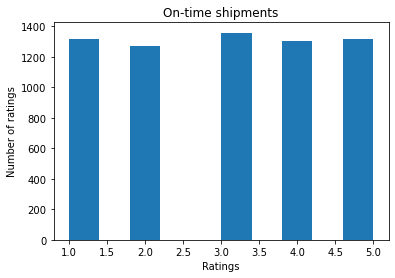

In [9]:
# histogram of ratings for on-time shipments
plt.hist(df[df['On_time'] == 1]['Customer_rating'])
plt.title('On-time shipments')
plt.xlabel('Ratings')
plt.ylabel('Number of ratings')
plt.show()

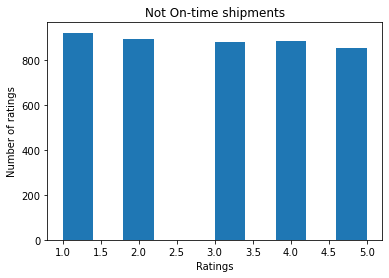

In [10]:
# histogram of ratings for not on-time shipments
plt.hist(df[df['On_time'] == 0]['Customer_rating'])
plt.title('Not On-time shipments')
plt.xlabel('Ratings')
plt.ylabel('Number of ratings')
plt.show()

Both are very close to uniform distributions.

H0: The is no significant difference in means
Ha: The means are significantly different

In [11]:
# perform permutation test
np.random.seed(21)
difference = []

for i in range(10000):
    permutation = np.random.permutation(df['Customer_rating'])
    difference.append(abs(np.mean(permutation[df['On_time']==1]) - np.mean(permutation[df['On_time']==0])))

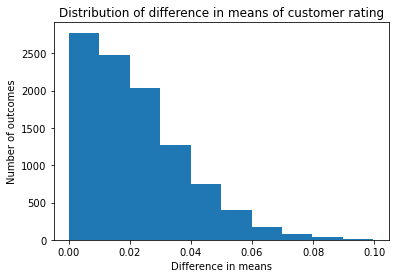

In [12]:
#Plot histogram of the difference list
plt.hist(difference)
plt.title('Distribution of difference in means of customer rating')
plt.xlabel('Difference in means')
plt.ylabel('Number of outcomes')
plt.show()

In [13]:
#Find p-value
p = np.sum(np.array(difference) >= obs_diff) / len(difference)
p

0.1657

We fail to reject the null hypothesis. The means are not significantly different.

In [14]:
# one-hot encode string columns to get numerical columns
df = pd.get_dummies(df, columns=['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'])
df.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,On_time,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,4,2,177,3,44,1233,1,0,0,0,1,0,1,0,0,0,1,0,1,0
1,4,5,216,2,59,3088,1,0,0,0,0,1,1,0,0,0,1,0,0,1
2,2,2,183,4,48,3374,1,1,0,0,0,0,1,0,0,0,1,0,0,1
3,3,3,176,4,10,1177,1,0,1,0,0,0,1,0,0,0,0,1,0,1
4,2,2,184,3,46,2484,1,0,0,1,0,0,1,0,0,0,0,1,1,0


In [15]:
# drop one of the gender columns
df = df.drop(columns=['Gender_M'])
df.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,On_time,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F
0,4,2,177,3,44,1233,1,0,0,0,1,0,1,0,0,0,1,0,1
1,4,5,216,2,59,3088,1,0,0,0,0,1,1,0,0,0,1,0,0
2,2,2,183,4,48,3374,1,1,0,0,0,0,1,0,0,0,1,0,0
3,3,3,176,4,10,1177,1,0,1,0,0,0,1,0,0,0,0,1,0
4,2,2,184,3,46,2484,1,0,0,1,0,0,1,0,0,0,0,1,1


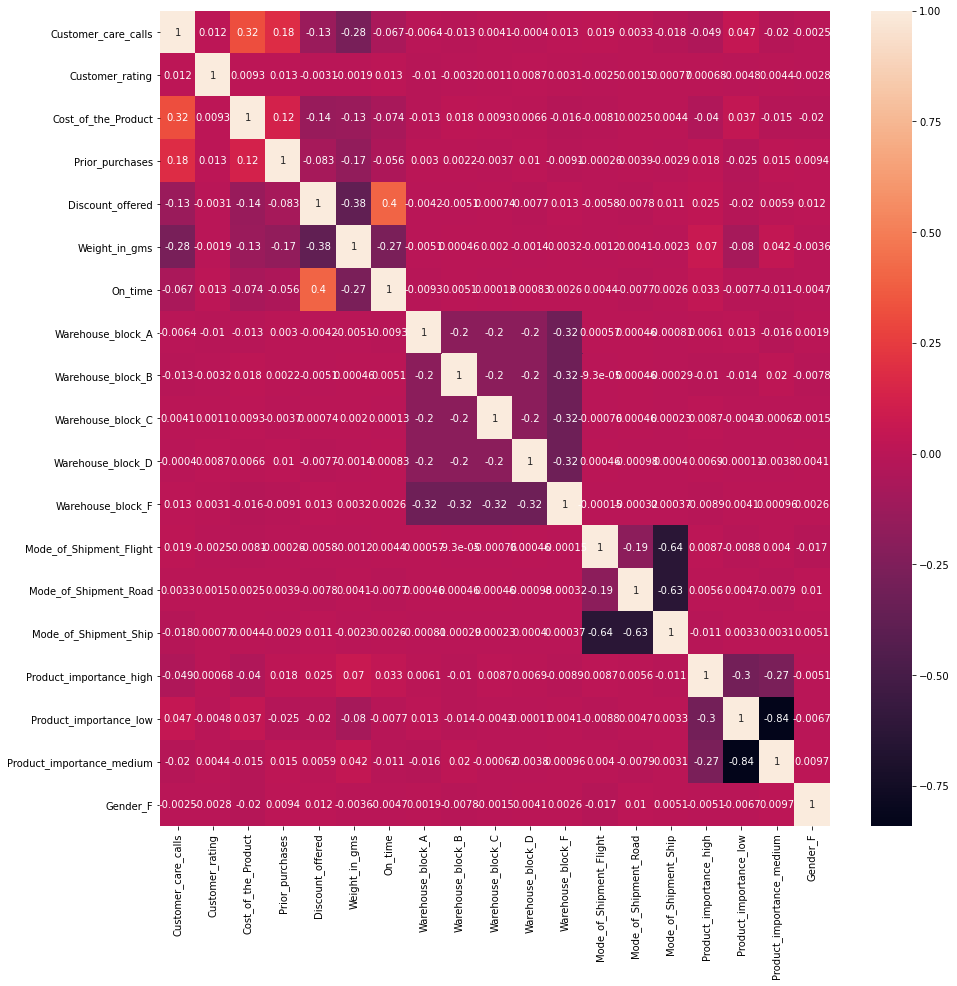

In [16]:
#Create a heatmap to see the correlation between each feature
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()

The On_time column has the highest correlation with the Discount_offered column.

In [17]:
# save df
df.to_csv('df.csv', index=False)